# TopSBM: Topic Modeling with Stochastic Block Models

In [1]:
%load_ext autoreload
%autoreload 2

import os
import pylab as plt
%matplotlib inline  

from sbmtm import sbmtm
import graph_tool.all as gt

import numpy as np
from matplotlib import pyplot as plt

gt.seed_rng(42) ## seed for graph-tool's random number generator --> same results

In [2]:
print(gt.openmp_get_num_threads())

4


# Fitting the model

In [3]:
## we create an instance of the sbmtm-class
model = sbmtm()

In [4]:
## we can also skip the previous step by saving/loading a graph
#model.save_graph(filename = 'graph.xml.gz')
model.load_graph(filename = 'graph.xml.gz')

In [5]:
model.g

<Graph object, undirected, with 3233 vertices and 1344987 edges at 0x7f9c8455e128>

In [ ]:
model.fit()
#model.fit_overlap()

In [7]:
state = model.state

In [8]:
state

<NestedBlockState object, with base <BlockState object with 3216 blocks (3216 nonempty), degree-corrected, for graph <Graph object, undirected, with 3233 vertices and 1344987 edges at 0x7f9c8455e128>, at 0x7f9c3dc51ac8>, and 7 levels of sizes [(3233, 3216), (3216, 1801), (1801, 1103), (1103, 428), (428, 28), (28, 2), (2, 1)] at 0x7f9c3dc51b70>

In [9]:
state.draw(layout='bipartite', output='bipartite_overlap.png')

(<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7f9c8455e128, at 0x7f9c8b3b07f0>,
 <Graph object, directed, with 9812 vertices and 9811 edges at 0x7f9c3c6c5c18>,
 <PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7f9c3c6c5c18, at 0x7f9c3dc65668>)

In [10]:
state.draw(output='circular_overlap.png')

(<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7f9c8455e128, at 0x7f9c3c722a58>,
 <Graph object, directed, with 9812 vertices and 9811 edges at 0x7f9c8b3a6588>,
 <PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7f9c8b3a6588, at 0x7f9c3c762b70>)

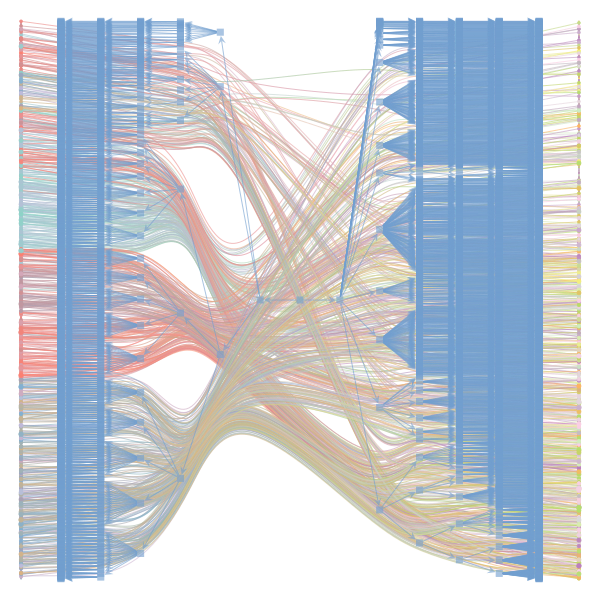

In [11]:
model.plot(nedges=1000)

In [ ]:
model.get_groups(l=0)

In [ ]:
state.get_levels()[0]

# Plotting the result

The output shows the (hierarchical) community structure in the word-document network as inferred by the stochastic block model:

- document-nodes are on the left
- word-nodes are on the right
- different colors correspond to the different groups

The result is a grouping of nodes into groups on multiple levels in the hierarchy:

- on the uppermost level, each node belongs to the same group (square in the middle)
- on the next-lower level, we split the network into two groups: the word-nodes and the document-nodes (blue sqaures to the left and right, respectively). This is a trivial structure due to the bipartite character of the network.
- only next lower levels constitute a non-trivial structure: We now further divide nodes into smaller groups (document-nodes into document-groups on the left and word-nodes into word-groups on the right)

In [ ]:
model.plot(nedges=1000)

In [ ]:
model.plot("bipartitehSBM.pdf", nedges=1000)

# The basics

## Topics
For each word-group on a given level in the hierarchy, we retrieve the $n$ most common words in each group -- these are the topics!


In [66]:
l=2

In [67]:
model.topics(l=l,n=20)

{0: [('ENSMUSG00000000031', 0.3628707433174661),
  ('ENSMUSG00000028195', 0.34859025997803),
  ('ENSMUSG00000048583', 0.28853899670450384)],
 1: [('ENSMUSG00000028608', 0.2574169083203212),
  ('ENSMUSG00000040648', 0.2536248048182021),
  ('ENSMUSG00000036707', 0.24604059781396387),
  ('ENSMUSG00000027247', 0.24291768904751282)],
 2: [('ENSMUSG00000061082', 0.8408163265306122),
  ('ENSMUSG00000000094', 0.15918367346938775)],
 3: [('ENSMUSG00000000154', 1.0)],
 4: [('ENSMUSG00000000167', 1.0)],
 5: [('ENSMUSG00000000184', 1.0)],
 6: [('ENSMUSG00000000194', 0.36702954898911355),
  ('ENSMUSG00000031770', 0.3343701399688958),
  ('ENSMUSG00000031262', 0.2986003110419907)],
 7: [('ENSMUSG00000087166', 0.19753448781919578),
  ('ENSMUSG00000031297', 0.16877017904314645),
  ('ENSMUSG00000047751', 0.16143234517170532),
  ('ENSMUSG00000018569', 0.15908423833284416),
  ('ENSMUSG00000000303', 0.15732315820369827),
  ('ENSMUSG00000023906', 0.15585559142941005)],
 8: [('ENSMUSG00000000359', 1.0)],
 9:

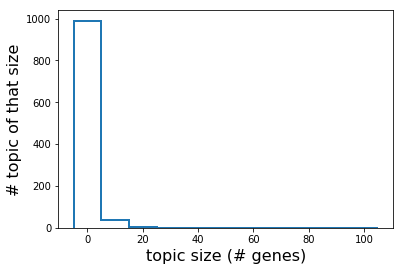

In [68]:
topic_lenghts = []
for topic in model.topics(l=l,n=2000):
    topic_lenghts.append(len(model.topics(l=l,n=2000)[topic]))
    
fig=plt.figure()
plt.hist(topic_lenghts, histtype='step', range=(-5,105), bins=11, lw=2)
plt.xlabel("topic size (# genes)", fontsize=16)
plt.ylabel("# topic of that size", fontsize=16)
plt.show()
fig.savefig("topic_size_%d.png"%l)

In [69]:
for ensg in model.topics(l=l,n=200)[5]:
    print(ensg[0])

ENSMUSG00000000184


### DAVID compatible format

In [70]:
model.print_topics(l=l, format='tsv')

## Topic-distribution in each document
Which topics contribute to each document?

In [71]:
## select a document (by its index)
i_doc = 814
print(model.documents[i_doc])
## get a list of tuples (topic-index, probability)
#model.topicdist(i_doc,l=0)

SLX.8412.N708_N502


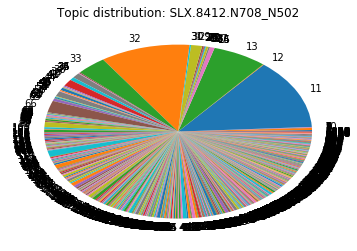

In [72]:
data = [el[1] for el in model.topicdist(i_doc,l=l)]
labels = [el[0]+1 for el in model.topicdist(i_doc,l=l)]
fig=plt.figure()
plt.pie(data, labels=labels)
plt.title("Topic distribution: %s"%model.documents[i_doc])
plt.show()
fig.savefig("topic_distr_%s.png"%model.documents[i_doc])

# Extra: Clustering of documents - for free.
The stochastic block models clusters the documents into groups.
We do not need to run an additional clustering to obtain this grouping.


In [73]:
model.clusters(l=l,n=500)

{0: [('SLX.8343.N701_N502', 1.0),
  ('SLX.8343.N702_N507', 1.0),
  ('SLX.8409.N701_N508', 1.0),
  ('SLX.8343.N708_N507', 1.0),
  ('SLX.8412.N711_N507', 1.0),
  ('SLX.9562.N701_N507', 1.0),
  ('SLX.9559.N703_N507', 1.0),
  ('SLX.8343.N706_N506', 1.0),
  ('SLX.8409.N708_N506', 1.0),
  ('SLX.8343.N705_N505', 1.0),
  ('SLX.8344.N705_N508', 1.0),
  ('SLX.9560.N705_N508', 1.0),
  ('SLX.8343.N703_N506', 1.0),
  ('SLX.9562.N709_N502', 1.0),
  ('SLX.8343.N702_N508', 1.0),
  ('SLX.9559.N709_N502', 1.0),
  ('SLX.9560.N707_N503', 1.0),
  ('SLX.8343.N701_N505', 1.0),
  ('SLX.8343.N701_N507', 1.0),
  ('SLX.9562.N711_N508', 1.0)],
 1: [('SLX.8344.N706_N506', 1.0),
  ('SLX.8345.N705_N504', 1.0),
  ('SLX.8344.N704_N502', 1.0),
  ('SLX.8344.N704_N503', 1.0),
  ('SLX.8344.N704_N504', 1.0),
  ('SLX.8344.N704_N505', 1.0),
  ('SLX.8344.N704_N506', 1.0),
  ('SLX.8345.N707_N501', 1.0),
  ('SLX.8344.N705_N505', 1.0),
  ('SLX.8344.N705_N506', 1.0),
  ('SLX.8344.N706_N501', 1.0),
  ('SLX.8344.N706_N502', 1.0),
 

Application -- Finding similar articles:

For a query-article, we return all articles from the same group

In [75]:
## select a document (index)
i_doc = 20
print(i_doc,model.documents[i_doc])
## find all articles from the same group
## print: (doc-index, doc-title)
model.clusters_query(i_doc,l=l)

20 SLX.8343.N703_N506


[(0, 'SLX.8343.N701_N502'),
 (3, 'SLX.8343.N701_N505'),
 (5, 'SLX.8343.N701_N507'),
 (13, 'SLX.8343.N702_N507'),
 (14, 'SLX.8343.N702_N508'),
 (35, 'SLX.8343.N705_N505'),
 (44, 'SLX.8343.N706_N506'),
 (60, 'SLX.8343.N708_N507'),
 (129, 'SLX.8344.N705_N508'),
 (513, 'SLX.8409.N701_N508'),
 (566, 'SLX.8409.N708_N506'),
 (843, 'SLX.8412.N711_N507'),
 (936, 'SLX.9559.N703_N507'),
 (969, 'SLX.9559.N709_N502'),
 (1021, 'SLX.9560.N705_N508'),
 (1029, 'SLX.9560.N707_N503'),
 (1147, 'SLX.9562.N701_N507'),
 (1181, 'SLX.9562.N709_N502'),
 (1197, 'SLX.9562.N711_N508')]

# More technical: Group membership
In the stochastic block model, word (-nodes) and document (-nodes) are clustered into different groups.

The group membership can be represented by the conditional probability $P(\text{group}\, |\, \text{node})$. Since words and documents belong to different groups (the word-document network is bipartite) we can show separately:

- P(bd | d), the probability of document $d$ to belong to document group $bd$
- P(bw | w), the probability of word $w$ to belong to word group $bw$.

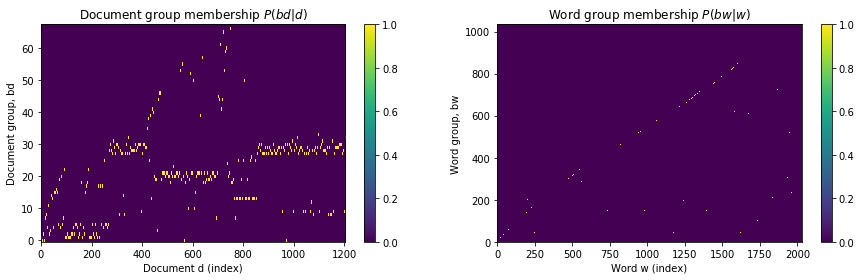

In [76]:
l=l
p_td_d,p_tw_w = model.group_membership(l=l)
fig = plt.figure(figsize=(15,4))
plt.subplot(121)
plt.imshow(p_td_d,origin='lower',aspect='auto',interpolation='none')
plt.title(r'Document group membership $P(bd | d)$')
plt.xlabel('Document d (index)')
plt.ylabel('Document group, bd')
plt.colorbar()

plt.subplot(122)
plt.imshow(p_tw_w,origin='lower',aspect='auto',interpolation='none')
plt.title(r'Word group membership $P(bw | w)$')
plt.xlabel('Word w (index)')
plt.ylabel('Word group, bw')
plt.colorbar()
plt.show()

In [77]:
fig.savefig("group_membership_%d.pdf"%l)
fig.savefig("group_membership_%d.png"%l)

In [78]:
overlaplenghts=[]
overlap_index = []
for i,el in enumerate(p_tw_w.T):
    mixture_size = len(np.nonzero(el)[0])
    overlaplenghts.append(mixture_size)
    if mixture_size>1:
        overlap_index.append(i)

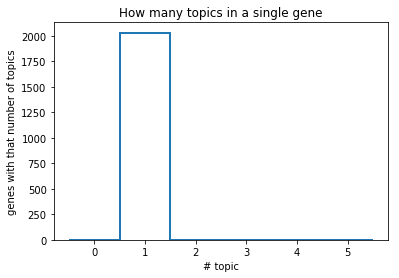

In [79]:
fig=plt.figure()
plt.title("How many topics in a single gene")
plt.xlabel("# topic")
plt.ylabel("genes with that number of topics")
plt.hist(overlaplenghts, histtype='step', lw=2, range=(-0.5,5.5), bins=6)
plt.show()
fig.savefig("overlap_size_%d.png"%l)

In [80]:
gene=300
for gene in overlap_index[:10]:
    fig=plt.figure()
    plt.title("Topic distribution of a single gene: %s"%model.words[gene])
    plt.xlabel("topic tw")
    plt.ylabel("probability")
    plt.ylim((0,1.1))
    plt.plot(p_tw_w.T[gene])
    plt.show()
    fig.savefig("distribution_single_gene_%s.png"%model.words[gene])

## overlapping genes

In [ ]:
#get genes overlapping
overlappinggenes = []
for i,el in enumerate(p_tw_w.T):
    if(len(np.nonzero(el)[0])>1):
        overlappinggenes.append(model.words[i])

In [ ]:
for g in overlappinggenes:
    print(g)

# state analysis

In [ ]:
state = model.state

In [ ]:
level = state.get_levels()[0]

In [ ]:
level.get_blocks()[4]

In [ ]:
e=level.get_matrix()
plt.matshow(e.todense())
plt.savefig("mat_%d.png"%l)

In [ ]:
state.get_levels()[0].get_overlap_blocks()[0]

In [ ]:
model.print_topics(l=0)

### topicdist

In [59]:
groups = model.groups[l]

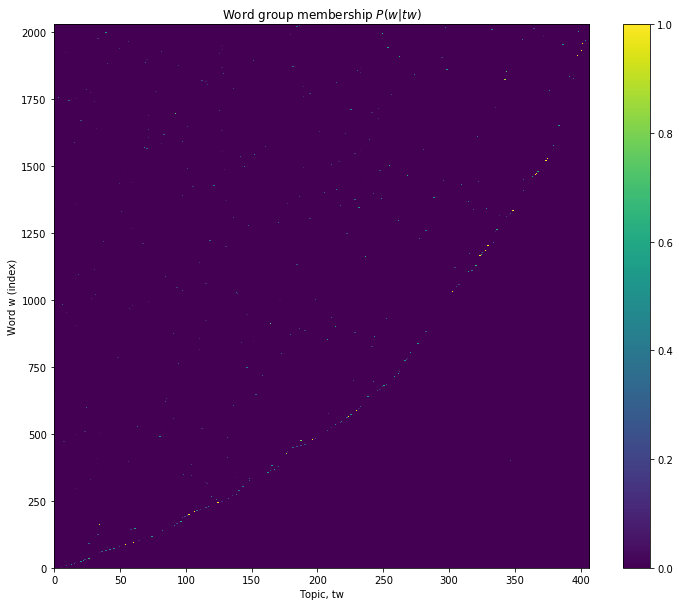

In [60]:
p_w_tw = groups['p_w_tw']
fig=plt.figure(figsize=(12,10))
plt.imshow(p_w_tw,origin='lower',aspect='auto',interpolation='none')
plt.title(r'Word group membership $P(w | tw)$')
plt.xlabel('Topic, tw')
plt.ylabel('Word w (index)')
plt.colorbar()
fig.savefig("p_w_tw_%d.png"%l)

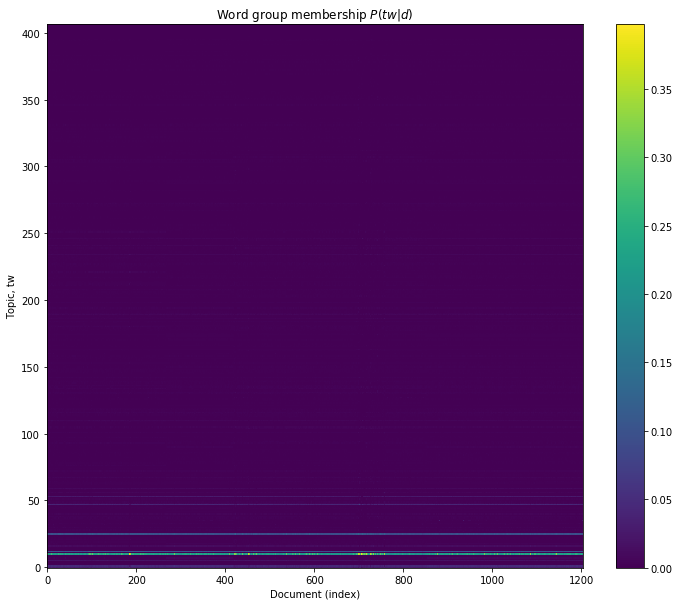

In [61]:
p_tw_d = groups['p_tw_d']
fig=plt.figure(figsize=(12,10))
plt.imshow(p_tw_d,origin='lower',aspect='auto',interpolation='none')
plt.title(r'Word group membership $P(tw | d)$')
plt.xlabel('Document (index)')
plt.ylabel('Topic, tw')
plt.colorbar()
fig.savefig("p_tw_d_%d.png"%l)

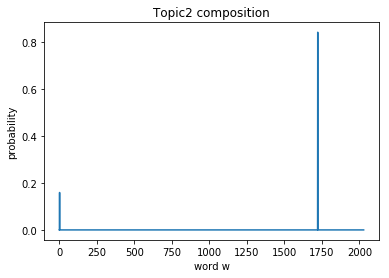

In [62]:
topic=2
fig=plt.figure()
plt.title("Topic%d composition"%topic)
plt.xlabel("word w")
plt.ylabel("probability")
plt.plot(p_w_tw.T[topic])
plt.show()
fig.savefig("Topic%d_composition.png"%topic)

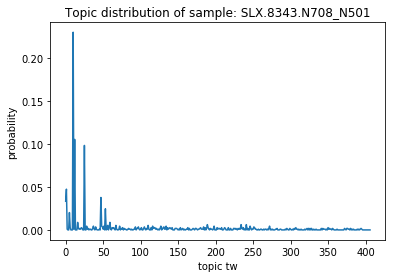

In [63]:
doc=54
title = model.documents[doc]
fig=plt.figure()
plt.title("Topic distribution of sample: %s"%title)
plt.xlabel("topic tw")
plt.ylabel("probability")
plt.plot(p_tw_d.T[doc])
plt.show()
fig.savefig("distribution_single_sample_%d.png"%doc)